In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt
sns.set(color_codes = True)
data = pd.read_csv('data.csv')
data.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN


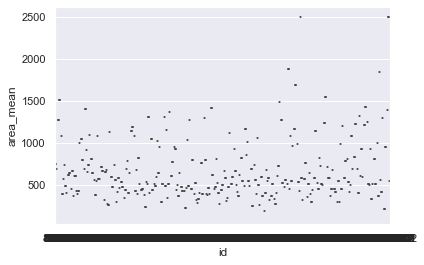

In [2]:
sns.boxplot(x='id', y='area_mean', data = data)
plt.show()

In [ ]:
for ajha, feature in enumerate(list(data.columns)):
    fg = sns.FacetGrid(data, hue='diagnosis', height=5)
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

In [ ]:
data.columns

In [4]:
from sklearn.preprocessing import StandardScaler
features = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
X = data.loc[:, features].values
y= data.loc[:, ['diagnosis']].values
X = StandardScaler().fit_transform(X)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)
datapca = pd.DataFrame(data = X, columns = ['principal component 1' , 'principal component 2'])



In [6]:
final  =pd.concat([datapca, data[['diagnosis']]], axis = 1)

In [7]:
final.head()

,principal component 1,principal component 2,diagnosis
0,9.192837,1.948583,M
1,2.387802,-3.768172,M
2,5.733896,-1.075174,M
3,7.122953,10.275589,M
4,3.935302,-1.948072,M


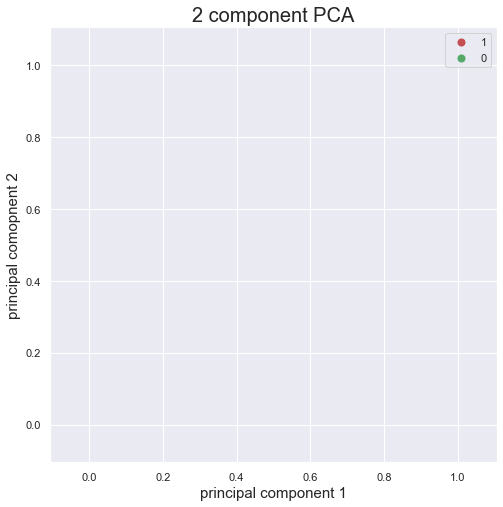

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('principal component 1' , fontsize = 15)
ax.set_ylabel('principal comopnent 2' , fontsize = 15)
ax.set_title('2 component PCA' , fontsize = 20)
targets = [1 , 0]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = final['diagnosis'] == target
    ax.scatter(final.loc[indicesToKeep, 'principal component 1']
              , final.loc[indicesToKeep, 'principal component 2'] 
              , c = color,
               s = 50)
    ax.legend(targets)
    ax.grid() 
                            